# Birmingham, Alabama Real Estate Pricing Analysis

## Introduction

In this project I have scraped data from various data about Birmingham, Alabama real estate price and its surround cities. Then I used Foursquare API to get the common venues of the boroughs.Then using K-means clustering I clustered Birmingham, AL surronding cities on the basis of the common venues.

## Importing Libraries

In [58]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Scraping the cities and zip codes from website 

In [ ]:
from gazpacho import get
from gazpacho import Soup

In [9]:
url = 'https://www.bestplaces.net/find/zip.aspx?msa=13820&st=AL'
html = get(url)
soup = Soup(html)

In [157]:
results = soup.find('a', {'href': '../zip-code/alabama'})

In [303]:
results[0:5]

[<a href="../zip-code/alabama/moody/35004"><u>35004 (Moody)</u></a>,
 <a href="../zip-code/alabama/adamsville/35005"><u>35005 (Adamsville)</u></a>,
 <a href="../zip-code/alabama/adger/35006"><u>35006 (Adger)</u></a>,
 <a href="../zip-code/alabama/alabaster/35007"><u>35007 (Alabaster)</u></a>,
 <a href="../zip-code/alabama/allgood/35013"><u>35013 (Allgood)</u></a>]

In [17]:
len(results)

119

## Cleaning the data to form a table

The table contains hyperlinks numbers and there are more than one zip code for several cities, so I decided to keep them due to some cities being assigned under the same zipcode but will be distinguished later on.

In [66]:
items = []
for i in range(len(results)):
    items.append(results[i].text)

In [302]:
items[0:3]

['35004 (Moody)', '35005 (Adamsville)', '35006 (Adger)']

In [68]:
new_items =[]
for i in items:
    new_items.append(i.replace('(','').replace(')',''))

In [69]:
zipcode_city = []
for i in new_items:
    zipcode_city.append(i.split(' '))

In [70]:
df = pd.DataFrame(zipcode_city)

In [71]:
df.head()

,0,1,2
0,35004,Moody,None
1,35005,Adamsville,None
2,35006,Adger,None
3,35007,Alabaster,None
4,35013,Allgood,None


In [72]:
#Dropping the "None" col and renaming 
df = df.drop(columns=[2])
df.columns = ['Zip_Code', 'City']

In [358]:
df['Zip_Code'] = pd.to_numeric(df['Zip_Code'])

In [359]:
df.head()

,Zip_Code,City
0,35004,Moody
1,35005,Adamsville
2,35006,Adger
3,35007,Alabaster
4,35013,Allgood


In [360]:
df.to_csv('birmingham.csv', index=False)

## Getting property data of the Birmingham (AL) area

This data was scraped from a local real estate website

The following lines of code are a dummy testing to see the best way to scrape and sort the data

In [282]:
url1 = 'https://www.findbirminghamproperties.com/search?sortby=highestprice&acl_zip5=35022&minbeds=0&minbaths=0&haslat=1&haslong=1&page=1&type=grid'
html1 = get(url1)
soup1 = Soup(html1)

In [283]:
res1 = soup1.find('div', {'data-castle-component':"FacebookSearchPixelComponent"}).find('script',{'type':'text/javascript'})

In [309]:
res1

<script type="text/javascript">
    (function() {
        CINC = typeof CINC === 'undefined' ? {} : CINC;
        CINC.SearchResults = [{"city":"Helena","state":"AL","zip":"35022","price":102400000,"pdid":"BHAMLNDV843870843870"},{"city":"Bessemer","state":"AL","zip":"35022","price":2000000,"pdid":"BHAMCOM762330762330"},{"city":"Bessemer","state":"AL","zip":"35022","price":1160000,"pdid":"BHAMLNDV835009835009"},{"city":"Bessemer","state":"AL","zip":"35022","price":975000,"pdid":"BHAMCOM846501846501"},{"city":"Bessemer","state":"AL","zip":"35022","price":950000,"pdid":"BHAMCOM401958401958"},{"city":"Bessemer","state":"AL","zip":"35022","price":795000,"pdid":"BHAMRESD871036871036"},{"city":"Bessemer","state":"AL","zip":"35022","price":745000,"pdid":"BHAMCOM823131823131"},{"city":"Bessemer","state":"AL","zip":"35022","price":724500,"pdid":"BHAMLNDV866793866793"},{"city":"Helena","state":"AL","zip":"35022","price":550000,"pdid":"BHAMRESD872825872825"},{"city":"Bessemer","state":"AL","zip":"

In [284]:
# In order to extract the needed data, we will create a list by way of the replace and split methods
test1 = res1.text.replace('[{', '},{').split('},{')

In [285]:
test1 = test1[1:-1] # Drops the first and last items in the list

In [286]:
print(len(test1),type(test1))

99 <class 'list'>


In [296]:
convert_list = []
for i in range(len(test1)):
    convert_list.append(test1[i].replace(',',':').split(':'))

In [301]:
convert_list[0:2]

[['"city"',
  '"Helena"',
  '"state"',
  '"AL"',
  '"zip"',
  '"35022"',
  '"price"',
  '102400000',
  '"pdid"',
  '"BHAMLNDV843870843870"'],
 ['"city"',
  '"Bessemer"',
  '"state"',
  '"AL"',
  '"zip"',
  '"35022"',
  '"price"',
  '2000000',
  '"pdid"',
  '"BHAMCOM762330762330"']]

In [306]:
dummyframe = pd.DataFrame(convert_list)

In [307]:
dummyframe.head()

,0,1,2,3,4,5,6,7,8,9
0,"""city""","""Helena""","""state""","""AL""","""zip""","""35022""","""price""",102400000,"""pdid""","""BHAMLNDV843870843870"""
1,"""city""","""Bessemer""","""state""","""AL""","""zip""","""35022""","""price""",2000000,"""pdid""","""BHAMCOM762330762330"""
2,"""city""","""Bessemer""","""state""","""AL""","""zip""","""35022""","""price""",1160000,"""pdid""","""BHAMLNDV835009835009"""
3,"""city""","""Bessemer""","""state""","""AL""","""zip""","""35022""","""price""",975000,"""pdid""","""BHAMCOM846501846501"""
4,"""city""","""Bessemer""","""state""","""AL""","""zip""","""35022""","""price""",950000,"""pdid""","""BHAMCOM401958401958"""


In [5]:
df = pd.read_csv('birmingham.csv')

In [10]:
zip_city_list = []
for i in range(len(df)):
    zc = df.iloc[i,0]
    url_a = f'https://www.findbirminghamproperties.com/search?sortby=highestprice&acl_zip5={zc}&minbeds=0&minbaths=0&haslat=1&haslong=1&page=1&type=grid'
    html_a = get(url_a)
    soup_a = Soup(html_a)
    res_a = soup_a.find('div', {'data-castle-component':"FacebookSearchPixelComponent"}).find('script',{'type':'text/javascript'})
    test_a = res_a.text.replace('[{', '},{').split('},{')
    test_a = test_a[1:-1]
    for i in range(len(test_a)):
        zip_city_list.append(test_a[i].replace(',',':').split(':'))    

In [11]:
print(zip_city_list[0], zip_city_list[-1])

['"city"', '"Moody"', '"state"', '"AL"', '"zip"', '"35004"', '"price"', '2500000', '"pdid"', '"BHAMLNDV850520850520"'] ['"city"', '"Lawley"', '"state"', '"AL"', '"zip"', '"36793"', '"price"', '164900', '"pdid"', '"BHAMRESD851921851921"']


In [12]:
len(zip_city_list)

5476

In [37]:
df1 = pd.DataFrame(zip_city_list)

In [38]:
df1.head()

,0,1,2,3,4,5,6,7,8,9
0,"""city""","""Moody""","""state""","""AL""","""zip""","""35004""","""price""",2500000,"""pdid""","""BHAMLNDV850520850520"""
1,"""city""","""Leeds""","""state""","""AL""","""zip""","""35004""","""price""",1410000,"""pdid""","""BHAMLNDV835091835091"""
2,"""city""","""Moody""","""state""","""AL""","""zip""","""35004""","""price""",1400000,"""pdid""","""BHAMCOM866137866137"""
3,"""city""","""Moody""","""state""","""AL""","""zip""","""35004""","""price""",595000,"""pdid""","""BHAMCOM863739863739"""
4,"""city""","""Moody""","""state""","""AL""","""zip""","""35004""","""price""",469000,"""pdid""","""BHAMCOM613584613584"""


In [39]:
df1.tail()

,0,1,2,3,4,5,6,7,8,9
5471,"""city""","""Maplesville""","""state""","""AL""","""zip""","""36750""","""price""",16000,"""pdid""","""BHAMLNDV861231861231"""
5472,"""city""","""Maplesville""","""state""","""AL""","""zip""","""36750""","""price""",9500,"""pdid""","""BHAMLNDV868346868346"""
5473,"""city""","""Randolph""","""state""","""AL""","""zip""","""36792""","""price""",239900,"""pdid""","""BHAMLNDV859796859796"""
5474,"""city""","""Lawley""","""state""","""AL""","""zip""","""36793""","""price""",229000,"""pdid""","""BHAMRESD867427867427"""
5475,"""city""","""Lawley""","""state""","""AL""","""zip""","""36793""","""price""",164900,"""pdid""","""BHAMRESD851921851921"""


## Cleaning Property Data

Firstly we want to remove the unwanted columns and then rename the columns and set the price and zip codes columns to numeric

In [40]:
df1.drop(columns=[0,2,3,4,6,8,9], inplace=True)

In [41]:
df1.head()

,1,5,7
0,"""Moody""","""35004""",2500000
1,"""Leeds""","""35004""",1410000
2,"""Moody""","""35004""",1400000
3,"""Moody""","""35004""",595000
4,"""Moody""","""35004""",469000


In [42]:
df1.columns=['City', 'Zip_Code','Price']

In [43]:
df1.columns

Index(['City', 'Zip_Code', 'Price'], dtype='object')

In [44]:
df1['Zip_Code'] = df1['Zip_Code'].str.replace('"','')
df1['Zip_Code'] = pd.to_numeric(df1["Zip_Code"])
df1['Price'] = pd.to_numeric(df1["Price"])

In [45]:
df1.head()

,City,Zip_Code,Price
0,"""Moody""",35004,2500000
1,"""Leeds""",35004,1410000
2,"""Moody""",35004,1400000
3,"""Moody""",35004,595000
4,"""Moody""",35004,469000


In [46]:
df1.to_csv('birmingham_zipcode.csv', index=False)

## Merging the tables of the Birmingham (AL) area and house prices

I have done inner joint because there were many other cities assigned under the same zipcodes and through this table join we are able to distinguish them.

In [47]:
data=pd.merge(df, df1, how='inner', left_on='Zip_Code', right_on='Zip_Code')

In [48]:
data.head()

,Zip_Code,City_x,City_y,Price
0,35004,Moody,"""Moody""",2500000
1,35004,Moody,"""Leeds""",1410000
2,35004,Moody,"""Moody""",1400000
3,35004,Moody,"""Moody""",595000
4,35004,Moody,"""Moody""",469000


In [49]:
# Drop the original city_x for the distinguished city_y and rename it
data = data.drop(columns='City_x')
data = data.rename(columns={'City_y':'City'})
data["City"] = data["City"].str.replace('"','')

In [50]:
data.head()

,Zip_Code,City,Price
0,35004,Moody,2500000
1,35004,Leeds,1410000
2,35004,Moody,1400000
3,35004,Moody,595000
4,35004,Moody,469000


## Finding Longitude and Latitude of the Locations

In [ ]:
import geocoder as geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [51]:
def getLatLong(row):
    #print('post :{}'.format(row[:]))
    #print('neigh :{}'.format(row[1]))
    # initialize your variable to None
    lat_lng_coords = None
    search_query = '{}, Birmingham,AL'.format(row)
    # loop until you get the coordinates
    try:
        while(lat_lng_coords is None):
            #g = geocoder.here(search_query,app_id=app_id,app_code=app_code)
            g = geocoder.arcgis(search_query)
            lat_lng_coords = g.latlng
            #print('FIRST')
    except IndexError:
        latitude = 0.0
        longitude = 0.0
        print('BACKUP')
        return [latitude,longitude]

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print(latitude, longitude)
    return [latitude, longitude]

In [52]:
coords_list = data['Zip_Code'].apply(getLatLong).tolist()

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.41099642371503 -86.90210606951142
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -86.97306427774133
33.469838066241785 -8

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
32.95366362138794 -87.14511241355787
32.95366362138794 -87.14511241355787
32.95366362138794 -87.14511241355787
32.95366362138794 -87.14511241355787
32.95366362138794 -87.14511241355787
32.95366362138794 -87.14511241355787
32.95366362138794 -87.14511241355787
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.468177602822614 -86.9594462362662
33.468177602822614 -86.9594462362662
33.468177602822614 -86.9594462362662
33.468177602822614 -86.9594462362662
33.468177602822614 -86.9594462362662
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.515555449090165 -86.62182657871548
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003

33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
33.07789343695876 -86.87718007058812
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.471071935354836 -86.97418531214586
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
33.56890329357493 -86.61662759175537
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.52201500000007 -86.84558999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.81235999999996
33.494755000000055 -86.8

33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.500212600000054 -86.87447449999996
33.46438500000005 -86.82058040299995
33.46438500000005 -86.82058040299995
33.46438500000005 -86.82058040299995
33.46438500000005 -86.82058040299995
33.4643850000000

33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000000045 -86.86026499999997
33.461235000

33.57232400000004 -86.89077649999996
33.57232400000004 -86.89077649999996
33.57232400000004 -86.89077649999996
33.57232400000004 -86.89077649999996
33.57232400000004 -86.89077649999996
33.57232400000004 -86.89077649999996
33.57232400000004 -86.89077649999996
33.57232400000004 -86.89077649999996
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
33.64139000000006 -86.69831499999998
3

33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
33.60569103200004 -86.75777999999997
3

33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.51290450000005 -86.92607539999995
33.393362800000034 -86.85278759999994
33.393362800000034 -86.85278759999994
33.393362800000034 -86.85278759999994
33.393362800000034 -86.85278759999994
33.393362800000034 -86.85278759999

33.543457000000046 -86.80233949999996
33.543457000000046 -86.80233949999996
33.543457000000046 -86.80233949999996
33.543457000000046 -86.80233949999996
33.543457000000046 -86.80233949999996
33.543457000000046 -86.80233949999996
33.543457000000046 -86.80233949999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000000035 -86.64953499999996
33.623185000

33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
33.44119000000006 -86.73712575699994
3

33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
33.52068000000003 -86.81175999999994
3

## Merging the values in the dataframe

In [53]:
data[['Latitude','Longitude']]=pd.DataFrame(coords_list,columns=['Latitude', 'Longitude'])
data.head()

,Zip_Code,City,Price,Latitude,Longitude
0,35004,Moody,2500000,33.52068,-86.81176
1,35004,Leeds,1410000,33.52068,-86.81176
2,35004,Moody,1400000,33.52068,-86.81176
3,35004,Moody,595000,33.52068,-86.81176
4,35004,Moody,469000,33.52068,-86.81176


In [54]:
data.tail()

,Zip_Code,City,Price,Latitude,Longitude
5471,36750,Maplesville,16000,33.52068,-86.81176
5472,36750,Maplesville,9500,33.52068,-86.81176
5473,36792,Randolph,239900,33.52068,-86.81176
5474,36793,Lawley,229000,33.52068,-86.81176
5475,36793,Lawley,164900,33.52068,-86.81176


In [56]:
data.to_csv('birmingham_location.csv', index=False)

### Use geopy library to get the latitude and longitude values of Birmingham (AL).

In [391]:
address = 'Birmingham, Alabama'

geolocator = Nominatim(user_agent="b_ham")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(f'The geographical coordinate of Birmingham, Alabama are {latitude}, {longitude}.')

The geographical coordinate of Birmingham, Alabama are 33.5206824, -86.8024326.


## Create a map of Birmingham (AL) with surrounding cities superimposed on top.

In [69]:
import folium # map rendering library

Now I want create a map of each of their locations based on the latitude and longitude coordinates. Ideally, each of the counters will also be labeled with their name.

In [62]:
locations = data[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
print(len(locationlist),locationlist[7])

5476 [33.52068000000003, -86.81175999999994]


In [76]:
bham_map = folium.Map(location=[33.5206824, -86.8024326], zoom_start=10)
# add markers to map
for point in range(0, len(locationlist)):
    folium.CircleMarker(
        locationlist[point],
        radius=2,
        popup=data['City'][point],
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(bham_map)

In [77]:
bham_map.save('bham_map.html')

Next, utilizing the Foursquare API to explore the neighborhoods and segment them.

## Define Foursquare Credentials and Version

In [6]:
data = pd.read_csv('birmingham_location.csv')

In [2]:
client_ID = "ULRKMZVQRUKEEHOUR3I5CXQTZWGPWXBN1DKRCSTXKL4NWP3R" # your FourSquare ID
client_secert = "4ANJVGOBOSFAZ2TXGICWXQGW3U11XT4FKJPQZWYG00ZL12JJ" # your FourSquare Secert
version = '20200207'

In [3]:
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [4]:
def getBuiltUrl(city_lat,city_long,radius=500):
    # type your answer here
    limit = 100
    url = f'https://api.foursquare.com/v2/venues/explore?&client_id={client_ID}&client_secret={client_secert}&v={version}&ll={city_lat},{city_long}&radius={radius}&limit={limit}'
    return url

## Exploring first Location in our dataframe

In [7]:
city_zip, city_name, house_price, city_lat, city_long = data.iloc[0]
print(f'Latitude and longitude values of {city_name} are {city_lat}, {city_long}.')
results = requests.get(getBuiltUrl(city_lat,city_long)).json()
results

Latitude and longitude values of Moody are 33.520680000000034, -86.81175999999995.


{'meta': {'code': 200, 'requestId': '5e3d6ce52115366da6856ecf'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central City',
  'headerFullLocation': 'Central City, Birmingham',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 21,
  'suggestedBounds': {'ne': {'lat': 33.52518000450004,
    'lng': -86.8063723606643},
   'sw': {'lat': 33.51617999550003, 'lng': -86.8171476393356}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c408a2ada3dc928e178c7b9',
       'name': 'Birmingham Museum Of Art',
       'location': {'address': '2000 Reverend Abraham Woods Jr Blvd',
        'lat': 33.5223112839542,
        'lng': -86.81040927908465,
        'labeledLatLngs': [{'label'

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Now cleaning the JSON file and structure it into a pandas dataframe

In [9]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Birmingham Museum Of Art,Art Museum,33.522311,-86.810409
1,Dorothy Jemison Day Theater,Theater,33.520788,-86.812425
2,Linn Park,Park,33.520308,-86.810116
3,Marilyn's Deli & Dogs,Diner,33.519404,-86.812838
4,BJCC Arena,Music Venue,33.523925,-86.813063


In [10]:
print(f'{nearby_venues.shape[0]} venues were returned by Foursquare.')

21 venues were returned by Foursquare.


## Function to repeat the same process for all surronding cities of Birmingham (AL)

Before running the process on the other cities, it would be best to create a new dataframe where all cities are group by their respected city and location. As well as aggregate the prices for each location.

In [11]:
data = pd.read_csv('birmingham_location.csv')

In [12]:
city_location = data.groupby(['City','Latitude','Longitude','Zip_Code']).agg({'Price':['mean']})

In [13]:
city_location.head()

Price
                                                   mean
City       Latitude  Longitude  Zip_Code               
Adamsville 33.520680 -86.811760 35006     115000.000000
           33.532210 -86.996310 35005     115334.482759
Adger      33.469838 -86.973064 35023     155900.000000
           33.520680 -86.811760 35006      80967.142857
Alabaster  33.520680 -86.811760 35007     298403.567010

In [14]:
city_location.to_csv('cities_locations.csv', index=False)

In [15]:
data2 = pd.read_csv('cities_locations.csv', header=2)
data2 = data2.rename(columns={'Unnamed: 4': 'Avg_Price'})
data2.Avg_Price = data2.Avg_Price.round(2)

In [16]:
data2.head()

,City,Latitude,Longitude,Zip_Code,Avg_Price
0,Adamsville,33.520680,-86.811760,35006,115000.00
1,Adamsville,33.532210,-86.996310,35005,115334.48
2,Adger,33.469838,-86.973064,35023,155900.00
3,Adger,33.520680,-86.811760,35006,80967.14
4,Alabaster,33.520680,-86.811760,35007,298403.57


In [17]:
data2.shape

(205, 5)

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        limit=100
        url = f'https://api.foursquare.com/v2/venues/explore?&client_id={client_ID}&client_secret={client_secert}&v={version}&ll={city_lat},{city_long}&radius={radius}&limit={limit}'
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Running our function for all locations within the dataframe

In [21]:
bham_venues = getNearbyVenues(names=data2['City'], 
                                   latitudes=data2['Latitude'], 
                                   longitudes=data2['Longitude'], 
                                   radius=1000)

Adamsville
Adamsville
Adger
Adger
Alabaster
Alabaster
Alabaster
Ashville
Bessemer
Bessemer
Bessemer
Bessemer
Bessemer
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Birmingham
Blount Springs
Blountsville
Brent
Brierfield
Brighton
Brookwood
Cahaba Heights
Calera
Carbon Hill
Center Point
Centreville
Centreville
Chelsea
Chelsea
Chelsea
Chelsea
Chelsea
Chula Vista
Clanton
Clanton
Clanton
Clay
Clay
Cleveland
Columbiana
Columbiana
Cordova
Cropwell
Docena
Docena
Dolomite
Dora
Empire
Fairfield
Fairfield
Fultondale
Fultondale
Gallant
Gardendale
Gardendale
Gardendale
Graysville
Graysville
Harpersville
Hayden
Hayden
Helena
Helena
Helena
Homewood
Homewood
Homewood
H

In [22]:
print(bham_venues.shape)
bham_venues.head()

(11890, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adamsville,33.52068,-86.81176,Birmingham Museum Of Art,33.522311,-86.810409,Art Museum
1,Adamsville,33.52068,-86.81176,Zoës Kitchen,33.517253,-86.809739,Mediterranean Restaurant
2,Adamsville,33.52068,-86.81176,Edgars Bakery -Financial Center,33.518434,-86.808393,Bakery
3,Adamsville,33.52068,-86.81176,BJCC Arena,33.523925,-86.813063,Music Venue
4,Adamsville,33.52068,-86.81176,Kelly Ingram Park,33.516397,-86.813729,Park


In [23]:
bham_venues.to_csv('bham_venues.csv', index=False)

In [24]:
bham_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Adamsville,116,116,116,116,116,116
Adger,116,116,116,116,116,116
Alabaster,174,174,174,174,174,174
Ashville,58,58,58,58,58,58
Bessemer,290,290,290,290,290,290
Birmingham,2088,2088,2088,2088,2088,2088
Blount Springs,58,58,58,58,58,58
Blountsville,58,58,58,58,58,58
Brent,58,58,58,58,58,58


In [25]:
print('There are {} uniques categories.'.format(len(bham_venues['Venue Category'].unique())))

There are 41 uniques categories.


## Analyzing each city's location

In [26]:
bham_venues = pd.read_csv('bham_venues.csv')

In [27]:
# one hot encoding
bham_onehot = pd.get_dummies(bham_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
bham_onehot['City'] = bham_venues['City'] 

# move city column to the first column
fixed_columns = [bham_onehot.columns[-1]] + list(bham_onehot.columns[:-1])
bham_onehot = bham_onehot[fixed_columns]

bham_onehot.head()

,City,American Restaurant,Art Museum,Asian Restaurant,Bakery,Bar,Beer Garden,Brazilian Restaurant,Burger Joint,Business Service,Café,Cocktail Bar,Coffee Shop,Concert Hall,Deli / Bodega,Diner,Food Court,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gym,Hawaiian Restaurant,History Museum,Hot Dog Joint,Hotel,Italian Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Music Venue,New American Restaurant,Park,Ramen Restaurant,Sandwich Place,Science Museum,Snack Place,Southern / Soul Food Restaurant,Speakeasy,Theater,Wine Bar,Wings Joint
0,Adamsville,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adamsville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adamsville,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adamsville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Adamsville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [28]:
bham_onehot.shape

(11890, 42)

## Grouping rows by each city and by taking the mean of the frequency of occurrence of each category 

In [29]:
bham_grouped = bham_onehot.groupby('City').mean().reset_index()
bham_grouped

,City,American Restaurant,Art Museum,Asian Restaurant,Bakery,Bar,Beer Garden,Brazilian Restaurant,Burger Joint,Business Service,Café,Cocktail Bar,Coffee Shop,Concert Hall,Deli / Bodega,Diner,Food Court,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gym,Hawaiian Restaurant,History Museum,Hot Dog Joint,Hotel,Italian Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Music Venue,New American Restaurant,Park,Ramen Restaurant,Sandwich Place,Science Museum,Snack Place,Southern / Soul Food Restaurant,Speakeasy,Theater,Wine Bar,Wings Joint
0,Adamsville,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
1,Adger,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
2,Alabaster,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
3,Ashville,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
4,Bessemer,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
5,Birmingham,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
6,Blount Springs,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
7,Blountsville,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
8,Brent,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
9,B

In [30]:
bhm = bham_grouped
bhm.head()

,City,American Restaurant,Art Museum,Asian Restaurant,Bakery,Bar,Beer Garden,Brazilian Restaurant,Burger Joint,Business Service,Café,Cocktail Bar,Coffee Shop,Concert Hall,Deli / Bodega,Diner,Food Court,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gym,Hawaiian Restaurant,History Museum,Hot Dog Joint,Hotel,Italian Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Music Venue,New American Restaurant,Park,Ramen Restaurant,Sandwich Place,Science Museum,Snack Place,Southern / Soul Food Restaurant,Speakeasy,Theater,Wine Bar,Wings Joint
0,Adamsville,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
1,Adger,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
2,Alabaster,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
3,Ashville,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241
4,Bessemer,0.051724,0.017241,0.034483,0.017241,0.068966,0.017241,0.017241,0.017241,0.017241,0.017241,0.034483,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.051724,0.017241,0.051724,0.017241,0.034483,0.017241,0.017241,0.034483,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.068966,0.017241,0.017241


### Top 5 most common venues for each city

In [31]:
num_top_venues = 5

for place in bhm['City']:
    print("----"+place+"----")
    temp = bhm[bhm['City'] == place].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adamsville----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Adger----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Alabaster----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Ashville----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Bessemer----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Birmingham----
                

                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Parrish----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Pelham----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Pell City----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Pinson----
                 venue  freq
0                  Bar  0.07
1              Theater  0.07
2  American Restaurant  0.05
3               Lounge  0.05
4                Hotel  0.05


----Pleasant Grove----
                 venue  freq
0   

## Put in the Dataframe

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create the new dataframe and display the top 10 venues for each city.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = bhm['City']

for ind in np.arange(bhm.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bhm.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adamsville,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
1,Adger,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
2,Alabaster,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
3,Ashville,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
4,Bessemer,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar


In [34]:
city_venues_sorted.rename(columns = {'City':'Location'}, inplace = True)

## Adding average house price of each city in the group

In [35]:
# Normalizing data2's Avg_Price column
bhm['Price']=data2['Avg_Price']
v = bhm.iloc[:, -1]
bhm.iloc[:,-1] = (v - v.min()) / (v.max() - v.min())

In [36]:
bhm.to_csv('bhm.csv', index=False)

# Clustering Cities

Running K-Means Clustering for four clusters

In [63]:
bhm = pd.read_csv('bhm.csv')

In [64]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [65]:
kclusters = 5

bham_grouped_clustering = bhm.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

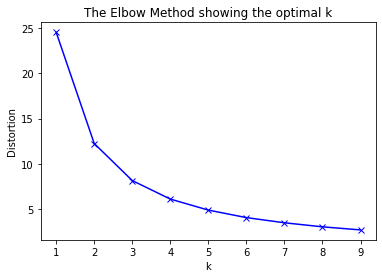

In [66]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(bham_grouped_clustering)
    kmeanModel.fit(bham_grouped_clustering)
    distortions.append(sum(np.min(cdist(bham_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / bham_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Create a new dataframe that includes the cluster as well as the top 10 venues for each of the surrounding cities

In [69]:
#city_venues_sorted.drop(columns = 'Cluster_Labels', inplace = True)

In [70]:
city_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

bham_merged = data2

bham_merged = bham_merged.join(city_venues_sorted.set_index('Location'), on='City')

bham_merged

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adamsville,33.520680,-86.811760,35006,115000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
1,Adamsville,33.532210,-86.996310,35005,115334.48,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
2,Adger,33.469838,-86.973064,35023,155900.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
3,Adger,33.520680,-86.811760,35006,80967.14,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
4,Alabaster,33.520680,-86.811760,35007,298403.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
5,Alabaster,33.520680,-86.811760,35051,1100000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
6,Alabaster,33.520680,-86.811760,35114,250014.29,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
7,Ashville,33.520680,-86.811760,35953,154656.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
8,Bessemer,33.410996,-86.902106,35022,384730.79,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar
9,Bessemer,33.440127,-86.933748,35020,96909.77,3,Theater,Bar,American Restaurant,Lounge,Hotel,Asian Restaurant,Park,Coffee Shop,Mexican Restaurant,Cocktail Bar


In [71]:
#Because of 0 values are in the data type of `Cluster_Labels` we convert it to int to avoid null values
bham_merged['Cluster_Labels'] = bham_merged['Cluster_Labels'].astype(int)
bham_merged.dtypes

City                       object
Latitude                  float64
Longitude                 float64
Zip_Code                    int64
Avg_Price                 float64
Cluster_Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

# Visualizing the clusters

In [67]:
import folium
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [68]:
bham_clusters = folium.Map(location=[33.5206824, -86.8024326], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bham_merged['Latitude'],bham_merged['Longitude'], bham_merged['City'], bham_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(bham_clusters)

In [69]:
bham_clusters.save('bham_clusters_map.html')

# Binning

## There is the range of `Avg_Price` so binned the price into seven distinct values

### ('Low level', 'Average level', 'Above Average','High level 1','High level 2')

In [53]:
# Visualizing the bins 
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'Price bins')

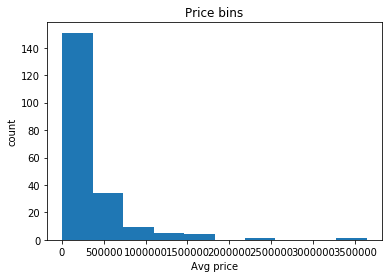

In [76]:
plt.pyplot.hist(bham_merged["Avg_Price"],bins=10)

# set x/y labels and plot title
plt.pyplot.xlabel("Avg price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

In [77]:
bins = np.linspace(min(bham_merged["Avg_Price"]), max(bham_merged["Avg_Price"]), 6)
bins

array([   6000.   ,  733105.162, 1460210.324, 2187315.486, 2914420.648,
       3641525.81 ])

In [78]:
group_names = ['Low level', 'Average level', 'Above Average','High level 1','High level 2']

In [79]:
bham_merged['Price_Categories'] = pd.cut(bham_merged['Avg_Price'], bins, labels=group_names, include_lowest=True )
bham_merged[['Avg_Price','Price_Categories']].head()

,Avg_Price,Price_Categories
0,115000.00,Low level
1,115334.48,Low level
2,155900.00,Low level
3,80967.14,Low level
4,298403.57,Low level


## Cluster bins

Text(0.5, 1.0, 'Cluster Labels')

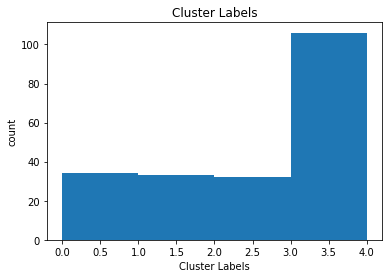

In [80]:
# Creating 4 bins for clusters
plt.pyplot.hist(bham_merged["Cluster_Labels"],bins=4)

# set x/y labels and plot title
plt.pyplot.xlabel("Cluster Labels")
plt.pyplot.ylabel("count")
plt.pyplot.title("Cluster Labels")

In [81]:
bins1 = np.linspace(min(bham_merged["Cluster_Labels"]), max(bham_merged["Cluster_Labels"]), 7)
bins1

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
       3.33333333, 4.        ])

In [82]:
group_names = ['Mixed Social Venues','Hotels and Social Venues','Stores and Plazas','Parks and Historic places', 'Sports and Recreations','Restaurants and Bars']

In [83]:
bham_merged['Cluster_Category'] = pd.cut(bham_merged['Cluster_Labels'], bins1, labels=group_names, include_lowest=True )
bham_merged[['Cluster_Labels','Cluster_Category']].head()

,Cluster_Labels,Cluster_Category
0,3,Sports and Recreations
1,3,Sports and Recreations
2,3,Sports and Recreations
3,3,Sports and Recreations
4,3,Sports and Recreations


# Final Data

In [84]:
bham_merged.drop(columns=['6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'],inplace=True)
bham_merged.head(10)

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
0,Adamsville,33.520680,-86.811760,35006,115000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
1,Adamsville,33.532210,-86.996310,35005,115334.48,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
2,Adger,33.469838,-86.973064,35023,155900.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
3,Adger,33.520680,-86.811760,35006,80967.14,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
4,Alabaster,33.520680,-86.811760,35007,298403.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
5,Alabaster,33.520680,-86.811760,35051,1100000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Sports and Recreations
6,Alabaster,33.520680,-86.811760,35114,250014.29,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
7,Ashville,33.520680,-86.811760,35953,154656.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
8,Bessemer,33.410996,-86.902106,35022,384730.79,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
9,Bessemer,33.440127,-86.933748,35020,96909.77,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations


In [83]:
bham_merged.to_csv('bham_merged.csv', index=False)

# Visualizing Birmingham (AL) and its surrounding cities in terms of housing prices and cluster markers with a choropleth map

To visualize the housing prices, we will use GeoJSON which is a JSON based format designed to represent the geographical features with their non-spatial attributes.

In [76]:
import folium

bhm_geo = r'zip_codes.geojson'
bhm_map = folium.Map(location = [33.5206824, -86.8024326], zoom_start = 10)

bhm_map.choropleth(
    geo_data=bhm_geo,
    data=bham_merged,
    columns=['Zip_Code','Avg_Price'],
    key_on='feature.properties.ZIPCODE',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Avg. Housing Prices'
)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bham_merged['Latitude'],bham_merged['Longitude'], bham_merged['City'], bham_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(bhm_map)
       

bhm_map.save('bhm_housing_map.html')

D:\Users\frede\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [81]:
#Chloropleth map so to see how the Birmingham is clustered
bhm_geo = r'zip_codes.geojson'
bhm_map = folium.Map(location = [33.5206824, -86.8024326], zoom_start = 10)

bhm_map.choropleth(
    geo_data=bhm_geo,
    data=bham_merged,
    columns=['Zip_Code','Cluster_Labels'],
    key_on='feature.properties.ZIPCODE',
    fill_color='PuRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Cluster Labels'
)
bhm_map.save('bham_cluster_labels_map.html')

D:\Users\frede\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Examining the clusters

### Cluster 1

In [85]:
#bham_merged.drop(columns='Unnamed: 0', inplace=True)

In [86]:
bham_merged[bham_merged['Cluster_Labels'] == 0]

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
67,Clanton,33.520680,-86.811760,35045,334474.74,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
68,Clanton,33.520680,-86.811760,35046,192125.21,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
69,Clanton,33.520680,-86.811760,36091,339000.00,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
70,Clay,33.641390,-86.698315,35215,216900.00,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
71,Clay,33.677266,-86.681621,35126,349600.00,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
72,Cleveland,33.520680,-86.811760,35049,112875.00,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
73,Columbiana,33.520680,-86.811760,35051,284451.32,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
74,Columbiana,33.520680,-86.811760,35078,189900.00,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
75,Cordova,33.520680,-86.811760,35550,53120.00,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues
76,Cropwell,33.520680,-86.811760,35054,320447.16,0,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Mixed Social Venues


### Cluster 2

In [87]:
bham_merged[bham_merged['Cluster_Labels'] == 1]

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
172,Remlap,33.520680,-86.811760,35133,185219.04,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
173,Riverside,33.520680,-86.811760,35135,215627.75,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
174,Shelby,33.520680,-86.811760,35143,193972.09,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
175,Springville,33.520680,-86.811760,35146,303925.09,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
176,Steele,33.520680,-86.811760,35987,150950.00,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
177,Sterrett,33.520680,-86.811760,35147,241195.54,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
178,Sumiton,33.520680,-86.811760,35148,149400.00,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
179,Sylvan Springs,33.532385,-86.996754,35118,65100.00,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
180,Tarrant,33.605691,-86.757780,35217,46087.50,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues
181,Thorsby,33.520680,-86.811760,35171,149608.00,1,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Hotels and Social Venues


### Cluster 3

In [88]:
bham_merged[bham_merged['Cluster_Labels'] == 2]

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
140,Minor,33.512905,-86.926075,35224,107900.00,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
141,Montevallo,33.077893,-86.877180,35115,200288.95,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
142,Montevallo,33.520680,-86.811760,35007,321300.00,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
143,Moody,33.515555,-86.621827,35094,524000.00,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
144,Moody,33.520680,-86.811760,35004,281775.94,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
145,Morris,33.520680,-86.811760,35116,245923.68,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
146,Mount Olive,33.619366,-86.874222,35117,180867.02,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
147,Mountain Brook,33.417701,-86.787562,35216,369900.00,2,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Stores and Plazas
148,Mountain Brook,33.441190,-86.737126,35243,910862.50,2,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Stores and Plazas
149,Mountain Brook,33.491312,-86.721239,35223,769025.12,2,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Stores and Plazas


### Cluster 4

In [89]:
bham_merged[bham_merged['Cluster_Labels'] == 3]

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
0,Adamsville,33.520680,-86.811760,35006,115000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
1,Adamsville,33.532210,-86.996310,35005,115334.48,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
2,Adger,33.469838,-86.973064,35023,155900.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
3,Adger,33.520680,-86.811760,35006,80967.14,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
4,Alabaster,33.520680,-86.811760,35007,298403.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
5,Alabaster,33.520680,-86.811760,35051,1100000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Sports and Recreations
6,Alabaster,33.520680,-86.811760,35114,250014.29,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
7,Ashville,33.520680,-86.811760,35953,154656.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
8,Bessemer,33.410996,-86.902106,35022,384730.79,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
9,Bessemer,33.440127,-86.933748,35020,96909.77,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations


### Cluster 5

In [90]:
bham_merged[bham_merged['Cluster_Labels'] == 4]

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
101,Hoover,33.352105,-86.847169,35244,764193.45,4,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Restaurants and Bars
102,Hoover,33.393363,-86.852788,35226,580051.30,4,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Restaurants and Bars
103,Hoover,33.397276,-86.683111,35242,1192647.62,4,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Restaurants and Bars
104,Hoover,33.410996,-86.902106,35022,394633.33,4,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Restaurants and Bars
105,Hoover,33.417701,-86.787562,35216,321900.00,4,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Restaurants and Bars
106,Hoover,33.520680,-86.811760,35080,412449.50,4,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Restaurants and Bars
107,Hoover,33.565800,-86.713095,35206,327900.00,4,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Restaurants and Bars
108,Hueytown,33.469838,-86.973064,35023,164174.00,4,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Restaurants and Bars
109,Indian Springs Village,33.308438,-86.742088,35124,1470246.67,4,Theater,Bar,American Restaurant,Lounge,Hotel,Above Average,Restaurants and Bars
110,Indian Springs Village,33.397276,-86.683111,35242,2499000.00,4,Theater,Bar,American Restaurant,Lounge,Hotel,High level 1,Restaurants and Bars


## Examining property prices

In [92]:
bham_merged[bham_merged['Price_Categories'] == 'High level 2']

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
95,Helena,33.410996,-86.902106,35022,3641525.81,0,Theater,Bar,American Restaurant,Lounge,Hotel,High level 2,Mixed Social Venues


In [93]:
bham_merged[bham_merged['Price_Categories'] == 'High level 1']

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
110,Indian Springs Village,33.397276,-86.683111,35242,2499000.0,4,Theater,Bar,American Restaurant,Lounge,Hotel,High level 1,Restaurants and Bars


In [94]:
bham_merged[bham_merged['Price_Categories'] == 'Above Average']

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
33,Birmingham,33.520680,-86.811760,35043,1650000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Above Average,Sports and Recreations
57,Carbon Hill,33.520680,-86.811760,35549,1700000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Above Average,Sports and Recreations
109,Indian Springs Village,33.308438,-86.742088,35124,1470246.67,4,Theater,Bar,American Restaurant,Lounge,Hotel,Above Average,Restaurants and Bars
115,Jasper,33.844961,-87.273656,35501,1711422.22,4,Theater,Bar,American Restaurant,Lounge,Hotel,Above Average,Restaurants and Bars


In [96]:
bham_merged[bham_merged['Price_Categories'] == 'Average level']

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
5,Alabaster,33.520680,-86.811760,35051,1100000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Sports and Recreations
13,Birmingham,33.352105,-86.847169,35244,1082450.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Sports and Recreations
15,Birmingham,33.397276,-86.683111,35242,1426330.95,3,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Sports and Recreations
65,Chelsea,33.520680,-86.811760,35186,830500.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Sports and Recreations
66,Chula Vista,33.515555,-86.621827,35094,750000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Sports and Recreations
101,Hoover,33.352105,-86.847169,35244,764193.45,4,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Restaurants and Bars
103,Hoover,33.397276,-86.683111,35242,1192647.62,4,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Restaurants and Bars
124,Leeds,33.520680,-86.811760,35004,1410000.00,4,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Restaurants and Bars
148,Mountain Brook,33.441190,-86.737126,35243,910862.50,2,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Stores and Plazas
149,Mountain Brook,33.491312,-86.721239,35223,769025.12,2,Theater,Bar,American Restaurant,Lounge,Hotel,Average level,Stores and Plazas


In [98]:
bham_merged[bham_merged['Price_Categories'] == 'Low level']

,City,Latitude,Longitude,Zip_Code,Avg_Price,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Price_Categories,Cluster_Category
0,Adamsville,33.520680,-86.811760,35006,115000.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
1,Adamsville,33.532210,-86.996310,35005,115334.48,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
2,Adger,33.469838,-86.973064,35023,155900.00,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
3,Adger,33.520680,-86.811760,35006,80967.14,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
4,Alabaster,33.520680,-86.811760,35007,298403.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
6,Alabaster,33.520680,-86.811760,35114,250014.29,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
7,Ashville,33.520680,-86.811760,35953,154656.57,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
8,Bessemer,33.410996,-86.902106,35022,384730.79,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
9,Bessemer,33.440127,-86.933748,35020,96909.77,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations
10,Bessemer,33.469838,-86.973064,35023,164463.23,3,Theater,Bar,American Restaurant,Lounge,Hotel,Low level,Sports and Recreations


# References

https://www.bestplaces.net/find/zip.aspx?msa=13820&st=AL

https://www.findbirminghamproperties.com/

https://foursquare.com/developers/apps

https://python-visualization.github.io/folium/

https://github.com/python-visualization/folium/blob/master/examples/GeoJSON_and_choropleth.ipynb

https://data.birminghamal.gov/dataset/birmingham-area-zipcode-boundaries